In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
#import and split the data

In [3]:
diabetes = pd.read_csv("../input/diabetes/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [4]:
#set and fit the model

In [5]:
rf_model=RandomForestClassifier().fit(X_train,y_train)

In [6]:
#test error without tuning

In [7]:
y_pred=rf_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.7445887445887446

In [8]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
#model tuning

In [10]:
#very important parameter:
#max_features: the number of features to consider while splitting

#important parameters
#n_estimators: number of trees. 500 and 1000 are better than default setting(10) according to some scientific studies depend on data
#max_depth  : 
#min_samples_split


In [11]:
rf_params={"max_features":[2,5,8], "max_depth":[2,3,5,8,10],"n_estimators":[10,500,1000], "min_samples_split":[2,5,10] }
rf_tuned_model=GridSearchCV(rf_model, rf_params, cv=10,n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 11.7min finished


In [12]:
rf_tuned_model.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_split': 5,
 'n_estimators': 10}

In [13]:
rf_tuned_model=RandomForestClassifier(max_depth=8, max_features=8, min_samples_split=2, n_estimators=10).fit(X_train,y_train)

In [14]:
#test error after tuning

In [15]:
y_pred=rf_tuned_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7359307359307359

In [16]:
# We found 0.774 by Logistic Regression
#          0.775 by Naive Bayes 
#          0.731 by KNN
#          0.744 by Linear SVC
#          0.735 by Nonlinear SVC Steps
#          0.74  by ANN
#          0.753 by CART
#And now,  0.735 by Random Forest

In [17]:
#Importance Level of Features 

In [18]:
Importance = pd.DataFrame({"Importance": rf_tuned_model.feature_importances_*100},
                         index = X_train.columns)

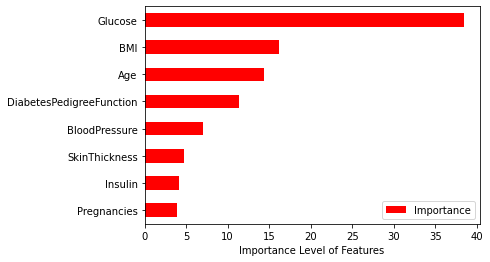

In [19]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Importance Level of Features");